In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
df = pd.read_csv ("C:\\Users\\Ale y Ali\\Downloads\\airline_passenger_satisfaction.csv")
df = df.drop("id", axis= 1)
df = df.drop("Unnamed: 0", axis= 1)
mean_delay = df["Arrival Delay in Minutes"].mean()
df["Arrival Delay in Minutes"].fillna(mean_delay, inplace=True)
column_names = df.columns.tolist()
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

X= df.drop("satisfaction", axis=1)
y = df["satisfaction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## pipeline 

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numeric_columns = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 
                   'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
                   'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 
                   'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 
                   'Arrival Delay in Minutes']

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder())
])

numeric_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ])

model = RandomForestClassifier()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in '
                                                   'Minutes'])])),
                ('model', RandomForestClassifier())])

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Realiza predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcula la exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcula la precisión, sensibilidad y valor F1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprime las métricas
print("Exactitud (Accuracy):", accuracy)
print("\nMatriz de Confusión:")
print(confusion)
print("\nPrecisión:", precision)
print("Sensibilidad (Recall):", recall)
print("Valor F1:", f1)

Exactitud (Accuracy): 0.9623213512343005

Matriz de Confusión:
[[11475   238]
 [  545  8523]]

Precisión: 0.9728341513525853
Sensibilidad (Recall): 0.9398985443317159
Valor F1: 0.9560827864714789


In [6]:
import pickle

# Guardar el pipeline completo
with open('pipeline_with_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

<Axes: >

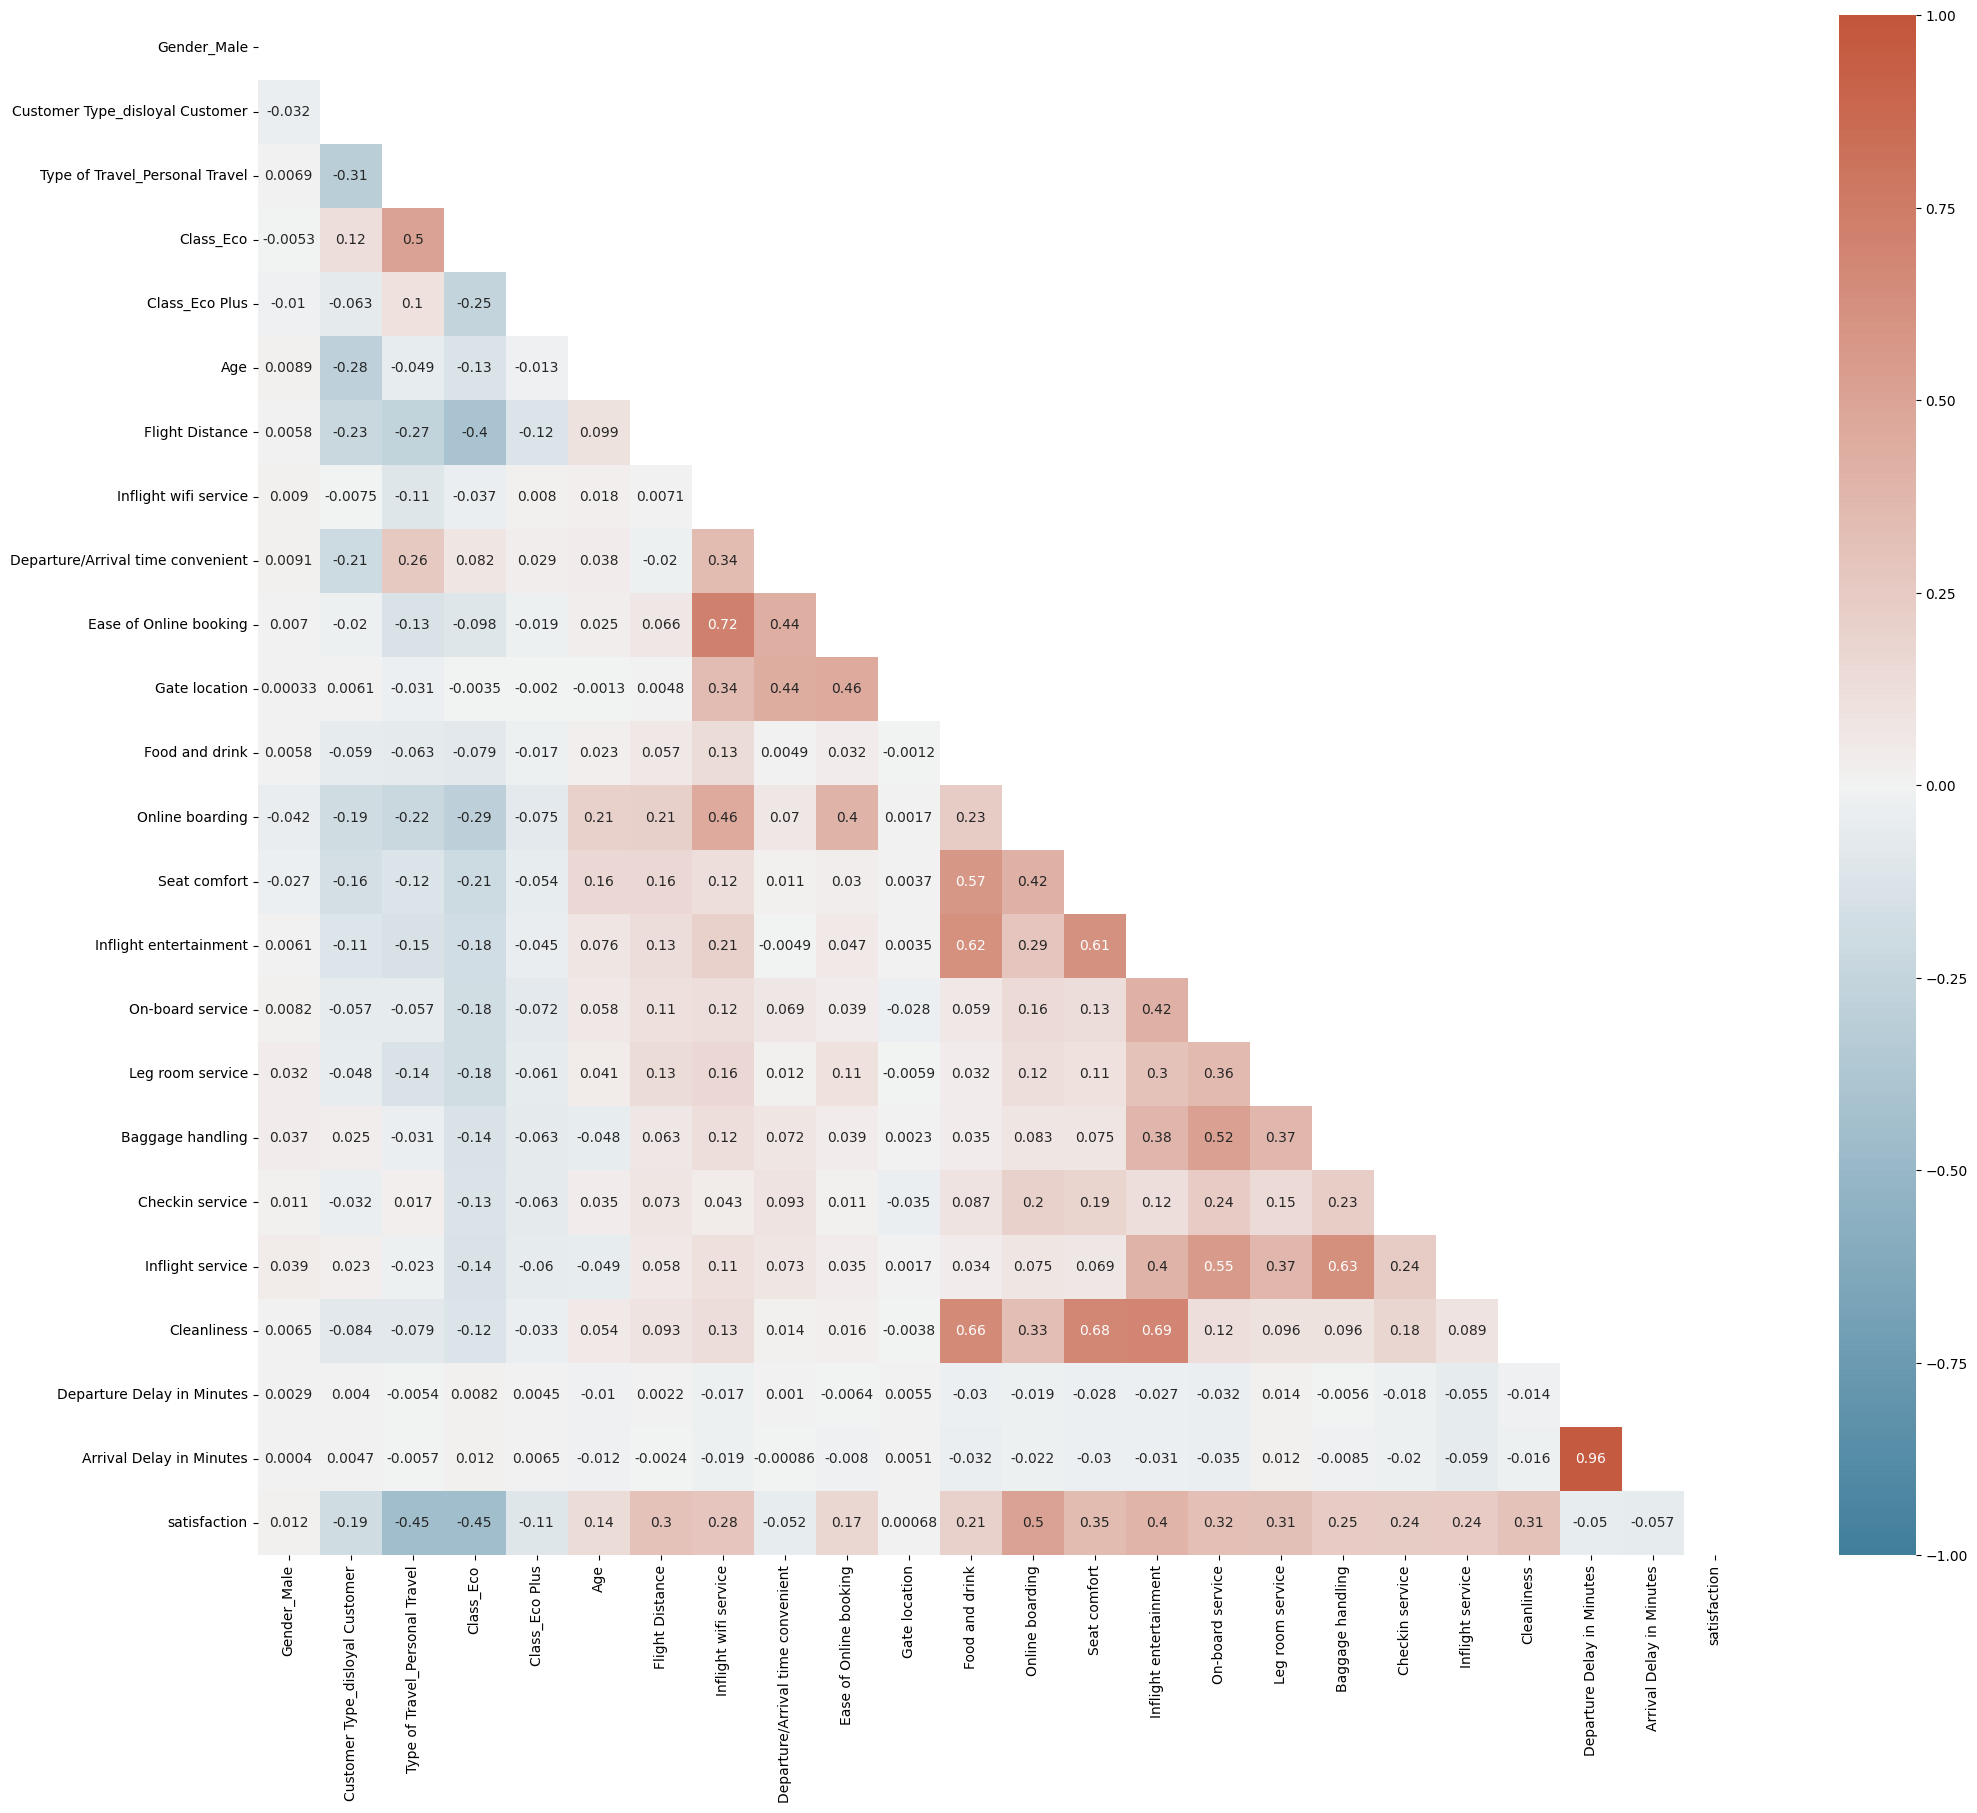

In [113]:
corr = X.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(24, 20))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap, vmin=-1, vmax=1)

In [158]:
"""
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = [
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(learning_rate=0.25, loss='exponential', max_depth=5, min_samples_split=4, n_estimators=50),
    XGBClassifier(),
    CatBoostClassifier(),
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = f1_score(y_train, y_pred_cv)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 score: {f1}")
    print("=" * 50)
"""

Model: RandomForestClassifier
Accuracy: 0.963
Precision: 0.973
Recall: 0.941
Model: GradientBoostingClassifier
Accuracy: 0.96
Precision: 0.971
Recall: 0.937
Model: XGBClassifier
Accuracy: 0.963
Precision: 0.972
Recall: 0.942
Learning rate set to 0.06016
0:	learn: 0.6117841	total: 31.5ms	remaining: 31.5s
1:	learn: 0.5459701	total: 62.9ms	remaining: 31.4s
2:	learn: 0.4911346	total: 95.9ms	remaining: 31.9s
3:	learn: 0.4319703	total: 127ms	remaining: 31.6s
4:	learn: 0.3967708	total: 160ms	remaining: 31.9s
5:	learn: 0.3658994	total: 192ms	remaining: 31.8s
6:	learn: 0.3381110	total: 222ms	remaining: 31.5s
7:	learn: 0.3175491	total: 254ms	remaining: 31.5s
8:	learn: 0.2972378	total: 287ms	remaining: 31.6s
9:	learn: 0.2803457	total: 326ms	remaining: 32.3s
10:	learn: 0.2680168	total: 355ms	remaining: 31.9s
11:	learn: 0.2535056	total: 391ms	remaining: 32.2s
12:	learn: 0.2433546	total: 431ms	remaining: 32.7s
13:	learn: 0.2350425	total: 474ms	remaining: 33.4s
14:	learn: 0.2250813	total: 513ms	remai

In [177]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Realizar la validación cruzada y obtener las predicciones
y_pred_cv = cross_val_predict(rf_model, X_train, y_train, cv=5)

# Calcular las métricas
accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv)
recall = recall_score(y_train, y_pred_cv)
f1 = f1_score(y_train, y_pred_cv)

print("Métricas modelo Random Forest:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Métricas modelo Random Forest:
Accuracy: 0.9624
Precision: 0.9725
Recall: 0.9397
F1 Score: 0.9558


In [20]:
import pickle

with open('rf_model_final.pickle', 'wb') as file:
    pickle.dump((rf_model), file)

print("Modelo guardado en 'rf_model_final.pickle'.")


Modelo guardado en 'rf_model_final.pickle'.


In [179]:
gbc_model = GradientBoostingClassifier(learning_rate=0.25, loss='exponential', max_depth=5, min_samples_split=4, n_estimators=50)

y_pred_cv = cross_val_predict(gbc_model, X_train, y_train, cv=5)

accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv)
recall = recall_score(y_train, y_pred_cv)
f1 = f1_score(y_train, y_pred_cv)

print("Métricas modelo Gradient Boosting:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Métricas modelo Gradient Boosting:
Accuracy: 0.9593
Precision: 0.9675
Recall: 0.9374
F1 Score: 0.9522


In [181]:
xgb_model = XGBClassifier()
y_pred_cv = cross_val_predict(xgb_model, X_train, y_train, cv=5)

accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv)
recall = recall_score(y_train, y_pred_cv)
f1 = f1_score(y_train, y_pred_cv)

print("Métricas modelo XGB:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Métricas modelo XGB:
Accuracy: 0.9627
Precision: 0.9695
Recall: 0.9435
F1 Score: 0.9563


In [182]:
cat_model = CatBoostClassifier()
y_pred_cv = cross_val_predict(cat_model, X_train, y_train, cv=5)

accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv)
recall = recall_score(y_train, y_pred_cv)
f1 = f1_score(y_train, y_pred_cv)

print("Métricas modelo CatBooster:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Learning rate set to 0.061841
0:	learn: 0.6095013	total: 36.5ms	remaining: 36.5s
1:	learn: 0.5422279	total: 69.8ms	remaining: 34.8s
2:	learn: 0.4864813	total: 104ms	remaining: 34.6s
3:	learn: 0.4204122	total: 138ms	remaining: 34.4s
4:	learn: 0.3866549	total: 172ms	remaining: 34.3s
5:	learn: 0.3617183	total: 209ms	remaining: 34.6s
6:	learn: 0.3373392	total: 245ms	remaining: 34.8s
7:	learn: 0.3171618	total: 278ms	remaining: 34.5s
8:	learn: 0.2989263	total: 312ms	remaining: 34.4s
9:	learn: 0.2791068	total: 345ms	remaining: 34.2s
10:	learn: 0.2590812	total: 378ms	remaining: 34s
11:	learn: 0.2456965	total: 415ms	remaining: 34.1s
12:	learn: 0.2362849	total: 452ms	remaining: 34.3s
13:	learn: 0.2285693	total: 491ms	remaining: 34.6s
14:	learn: 0.2186552	total: 520ms	remaining: 34.2s
15:	learn: 0.2124297	total: 548ms	remaining: 33.7s
16:	learn: 0.2045412	total: 582ms	remaining: 33.6s
17:	learn: 0.1998181	total: 613ms	remaining: 33.4s
18:	learn: 0.1950289	total: 647ms	remaining: 33.4s
19:	learn: 

In [188]:
import optuna
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

# Definir una función objetivo para Optuna
def objective(trial):
    # Definir los hiperparámetros para optimizar
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
        # Otros hiperparámetros que desees optimizar
    }

    # Crear y entrenar el modelo CatBoost
    model = CatBoostClassifier(**params, verbose=0)

    # Realizar una predicción con validación cruzada
    y_pred_cv = cross_val_predict(model, X, y, cv=5, method="predict_proba")

    # Calcular la métrica objetivo (puede ser cualquier métrica que desees optimizar)
    accuracy = accuracy_score(y, y_pred_cv.argmax(axis=1))

    return accuracy

# Crear un estudio Optuna
study = optuna.create_study(direction='maximize')  # Puedes ajustar 'maximize' o 'minimize' según la métrica
study.optimize(objective, n_trials=100)  # Puedes ajustar el número de iteraciones según tus recursos


[I 2023-09-10 21:29:01,136] A new study created in memory with name: no-name-01795df1-14bc-4df5-a71e-b490f3bc463f
[I 2023-09-10 21:30:27,275] Trial 0 finished with value: 0.9629946874037573 and parameters: {'iterations': 424, 'depth': 9, 'learning_rate': 0.01727388238412867}. Best is trial 0 with value: 0.9629946874037573.
[I 2023-09-10 21:31:45,279] Trial 1 finished with value: 0.9376347397597783 and parameters: {'iterations': 826, 'depth': 4, 'learning_rate': 0.0037041963606069947}. Best is trial 0 with value: 0.9629946874037573.
[I 2023-09-10 21:33:10,238] Trial 2 finished with value: 0.9628022020326455 and parameters: {'iterations': 924, 'depth': 5, 'learning_rate': 0.03663134979367845}. Best is trial 0 with value: 0.9629946874037573.
[I 2023-09-10 21:33:24,292] Trial 3 finished with value: 0.9210713735756082 and parameters: {'iterations': 152, 'depth': 4, 'learning_rate': 0.006144508073641049}. Best is trial 0 with value: 0.9629946874037573.
[I 2023-09-10 21:33:46,332] Trial 4 fin

KeyboardInterrupt: 

In [189]:
study.best_params

{'iterations': 634, 'depth': 9, 'learning_rate': 0.03188068232751233}

In [190]:
best_params = study.best_params
best_model = CatBoostClassifier(**best_params, verbose=0)

# Entrena el modelo final con todos los datos
best_model.fit(X, y)


In [2]:
'''import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score'''

'''# Define los hiperparámetros iniciales que quieres usar como base
base_params = {
    'n_estimators': 500,  # Por ejemplo, establece un valor fijo
    'max_depth': 15,      # Establece un valor fijo
    'random_state': 42    # Establece un valor fijo
}

def objective(trial):
    # Define los hiperparámetros a optimizar
    min_child_weight = trial.suggest_float("min_child_weight", 1e-5, 1.0)
    gamma = trial.suggest_float("gamma", 0.0, 1.0)
    subsample = trial.suggest_float("subsample", 0.1, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.1, 1.0)
    
    # Combina los hiperparámetros fijos con los sugeridos por Optuna
    params = {**base_params, 'min_child_weight': min_child_weight, 'gamma': gamma,
              'subsample': subsample, 'colsample_bytree': colsample_bytree}
    
    # Crea un modelo XGBoost con los hiperparámetros sugeridos
    model = xgb.XGBClassifier(**params)
    
    # Evalúa el modelo usando validación cruzada
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    
    # Calcula la puntuación media de validación cruzada
    accuracy = scores.mean()
    
    # Devuelve la puntuación (Optuna maximiza)
    return accuracy

# Crea un estudio de Optuna y optimiza los hiperparámetros
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)'''


'# Define los hiperparámetros iniciales que quieres usar como base\nbase_params = {\n    \'n_estimators\': 500,  # Por ejemplo, establece un valor fijo\n    \'max_depth\': 15,      # Establece un valor fijo\n    \'random_state\': 42    # Establece un valor fijo\n}\n\ndef objective(trial):\n    # Define los hiperparámetros a optimizar\n    min_child_weight = trial.suggest_float("min_child_weight", 1e-5, 1.0)\n    gamma = trial.suggest_float("gamma", 0.0, 1.0)\n    subsample = trial.suggest_float("subsample", 0.1, 1.0)\n    colsample_bytree = trial.suggest_float("colsample_bytree", 0.1, 1.0)\n    \n    # Combina los hiperparámetros fijos con los sugeridos por Optuna\n    params = {**base_params, \'min_child_weight\': min_child_weight, \'gamma\': gamma,\n              \'subsample\': subsample, \'colsample_bytree\': colsample_bytree}\n    \n    # Crea un modelo XGBoost con los hiperparámetros sugeridos\n    model = xgb.XGBClassifier(**params)\n    \n    # Evalúa el modelo usando validación

# análisis de predicciones

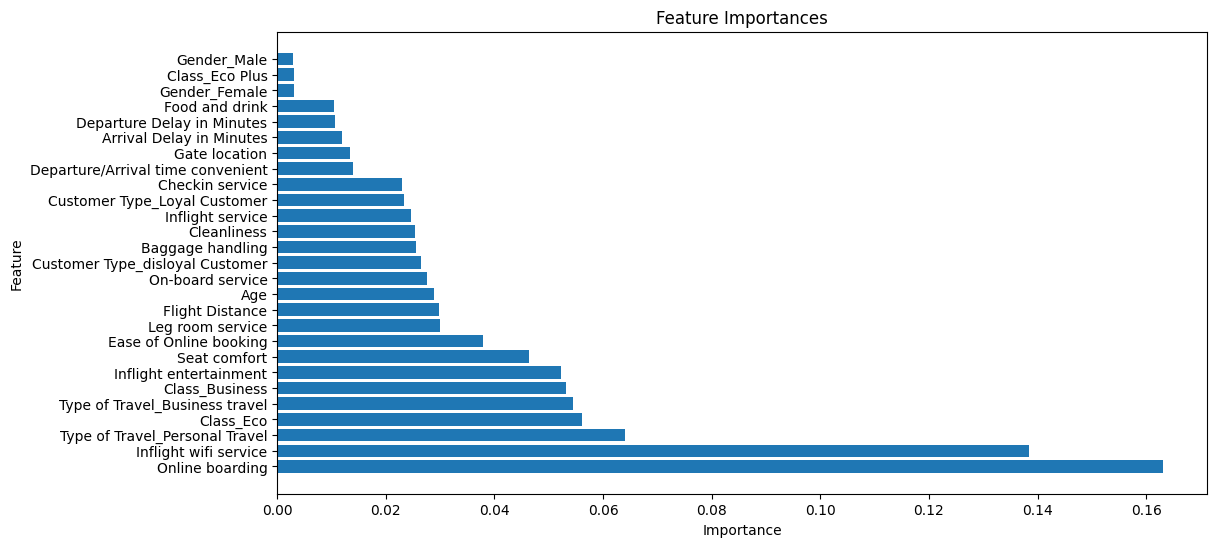

In [7]:

# Obtener la importancia de las características del modelo entrenado
feature_importance = pipeline.named_steps['model'].feature_importances_

# Obtener el objeto OneHotEncoder
onehot_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']

# Obtener los nombres de las características codificadas one-hot
categorical_features_encoded = onehot_encoder.get_feature_names_out(input_features=categorical_columns)

# Combinar los nombres de las características codificadas one-hot con las características numéricas
all_feature_names = list(categorical_features_encoded) + numeric_columns

# Crear un DataFrame para facilitar la visualización
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia de las características
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Crear un gráfico de barras para visualizar las importancias de las características
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


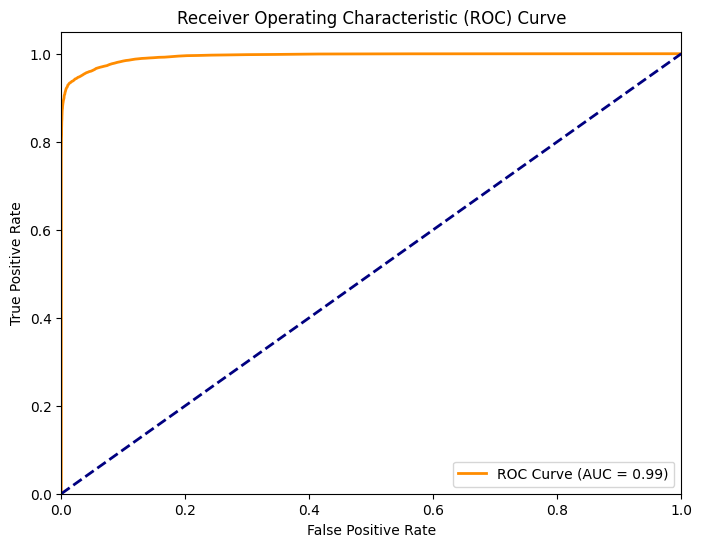

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de predicción en el conjunto de prueba
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el AUC (Área bajo la curva ROC)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [20]:
import joblib

# Guardar el codificador one-hot en un archivo
joblib.dump(categorical_transformer, 'categorical_transformer.pkl')

# Guardar el escalador MinMax en un archivo
joblib.dump(numeric_transformer, 'numeric_transformer.pkl')

['numeric_transformer.pkl']